# Reconocimiento de Dígitos escritos a mano
Para este ejemplo utilizaremos un conjunto de figuras, con dígitos escritos a mano, obtenidos de la base de datos de `tensorflow` *tensorflow_datasets*

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

## tensorflow_datasets
`tensorflow_datasets` es una biblioteca que proporciona acceso a una amplia variedad de conjuntos de datos para tareas de aprendizaje automático y análisis de datos. Puedes utilizar esta biblioteca para cargar y gestionar conjuntos de datos en TensorFlow. Algunos ejemplos de conjuntos de datos que puedes obtener utilizando `tensorflow_datasets` incluyen:

1. **MNIST**: Un conjunto de datos de dígitos escritos a mano que se utiliza comúnmente para la clasificación de imágenes.

2. **CIFAR-10 y CIFAR-100**: Conjuntos de datos de imágenes que contienen 10 y 100 clases diferentes, respectivamente.

3. **IMDB**: Conjunto de datos de revisiones de películas con etiquetas de sentimiento positivo o negativo, utilizado para la clasificación de texto.

4. **Horses or Humans**: Un conjunto de datos de imágenes que contiene imágenes de caballos y humanos, utilizado para tareas de clasificación de imágenes.

5. **Penn Treebank**: Conjunto de datos de texto utilizado para la tarea de modelado de lenguaje.

6. **COCO (Common Objects in Context)**: Un conjunto de datos grande que contiene imágenes de objetos cotidianos en contexto, utilizado para tareas de detección de objetos.

7. **SQuAD (Stanford Question Answering Dataset)**: Conjunto de datos de preguntas y respuestas basado en pasajes de texto, utilizado para tareas de procesamiento de lenguaje natural.

8. **Caltech 101**: Conjunto de datos de imágenes que contiene imágenes de objetos de 101 clases diferentes.

9. **UCI Machine Learning Repository**: Varios conjuntos de datos de la UCI Machine Learning Repository, que abarcan diversas áreas de aplicación.

Estos son solo algunos ejemplos, y `tensorflow_datasets` ofrece muchos más conjuntos de datos que cubren una amplia gama de tareas de aprendizaje automático y análisis de datos. Puedes explorar la documentación de `tensorflow_datasets` para obtener más información sobre los conjuntos de datos disponibles y cómo cargarlos en tu proyecto de aprendizaje automático.

In [2]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = [
    'Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis',
    'Siete', 'Ocho', 'Nueve'
]

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
#Normalizar: Numeros de 0 a 255, que sean de 0 a 1
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)


In [4]:
print(len(test_dataset))

10000


Defininimos un modelo de red neuronal utilizando la biblioteca TensorFlow con Keras.  


```python
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # para clasificación
])
```

1. `model = tf.keras.Sequential([])`: Aquí se crea un modelo secuencial vacío. Un modelo secuencial es una pila lineal de capas, donde los datos fluyen de una capa a la siguiente en orden secuencial. Puedes agregar diferentes capas al modelo dentro de los corchetes.

2. `tf.keras.layers.Flatten(input_shape=(28, 28, 1))`: Esta línea agrega la primera capa al modelo. La capa "Flatten" se utiliza para aplanar los datos de entrada. En este caso, la entrada se espera que sea una matriz de 28x28 píxeles (por ejemplo, imágenes en escala de grises) con una sola dimensión de canal. La capa "Flatten" convierte esta matriz en un vector unidimensional antes de pasar los datos a las capas densas.

3. `tf.keras.layers.Dense(64, activation=tf.nn.relu)`: Se agregan dos capas densas con 64 neuronas cada una. Las capas densas son capas completamente conectadas en las que cada neurona se conecta con todas las neuronas de la capa anterior. La función de activación `tf.nn.relu` (unidad lineal rectificada) se aplica en estas capas. Esta función introduce no linealidad en el modelo al ayudar a la red a aprender relaciones complejas en los datos.

4. `tf.keras.layers.Dense(10, activation=tf.nn.softmax)`: La última capa densa tiene 10 neuronas y utiliza la función de activación `tf.nn.softmax`. Esta capa se usa comúnmente en problemas de clasificación. La función "softmax" asigna probabilidades a las clases y se utiliza para obtener la probabilidad de que un punto de datos pertenezca a una de las 10 clases (asumiendo un problema de clasificación de 10 clases).

Así, este código define un modelo secuencial de red neuronal con capas de aplanamiento (Flatten) y dos capas densas intermedias con activación ReLU, seguidas de una capa densa de salida con activación softmax para la clasificación. Este modelo es adecuado para problemas de clasificación en los que se espera que la entrada sea una imagen de 28x28 píxeles en escala de grises con una sola dimensión de canal.


In [9]:
#Estructura de la red
model = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(28,28,1)),
	tf.keras.layers.Dense(64, activation=tf.nn.relu),
	tf.keras.layers.Dense(64, activation=tf.nn.relu),
	tf.keras.layers.Dense(10, activation=tf.nn.softmax) #para clasificacion
])


Esta parte del código se refiere a la compilación del modelo de red neuronal en TensorFlow utilizando Keras, que definimos previamente:

```python
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
```

1. `optimizer='adam'`: El optimizador se utiliza para ajustar los pesos del modelo durante el entrenamiento para minimizar la función de pérdida. En este caso, se ha seleccionado el optimizador "adam". Adam es un optimizador de descenso de gradiente estocástico (SGD) que se utiliza comúnmente en el aprendizaje profundo. Es una versión avanzada de SGD que se adapta automáticamente la tasa de aprendizaje durante el entrenamiento, lo que lo hace eficiente y efectivo.

2. `loss='sparse_categorical_crossentropy'`: La función de pérdida es una medida de cuán bien se está desempeñando el modelo. "sparse_categorical_crossentropy" es una función de pérdida utilizada comúnmente en problemas de clasificación. Se aplica cuando las etiquetas (objetivos) son enteros (por ejemplo, 0, 1, 2, etc.). La función de pérdida mide la diferencia entre las predicciones del modelo y las etiquetas reales, y el objetivo es minimizar esta diferencia durante el entrenamiento.

3. `metrics=['accuracy']`: Las métricas se utilizan para evaluar el rendimiento del modelo durante y después del entrenamiento. En este caso, se ha seleccionado la métrica "accuracy" (exactitud). La métrica de exactitud calcula la proporción de ejemplos de entrenamiento que se clasifican correctamente. Es una métrica comúnmente utilizada en problemas de clasificación y mide la proporción de predicciones correctas en relación con el número total de ejemplos.

Por lo que, el código `model.compile` configura la configuración necesaria para entrenar el modelo. Establece el optimizador que se utilizará para ajustar los pesos, la función de pérdida que se utilizará para medir el error y las métricas que se utilizarán para evaluar el rendimiento del modelo. Esto es una parte esencial en la configuración de una red neuronal antes de comenzar el proceso de entrenamiento.

In [10]:
#Compilamos e indicar las funciones a utilizar
model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy']
)

In [11]:
#Aprendizaje por lotes de 32 cada lote
"""
La operación // para calcular steps_per_epoch.
Esto asume que BATCHSIZE es un divisor exacto de num_train_examples,
lo cual es común en el entrenamiento de modelos.
El parámetro steps_per_epoch te permite controlar cuántos lotes (batches)
se procesan en cada época. Un lote es un subconjunto de ejemplos del conjunto
de datos de entrenamiento que se utiliza para actualizar los pesos del modelo
en un paso de entrenamiento.
"""
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

Esta parte del código se refiere al proceso de entrenamiento del modelo de red neuronal:

```python
historial = model.fit(
    train_dataset,
    epochs=5,
    steps_per_epoch=num_train_examples // BATCHSIZE,
    verbose=0
)
```

1. `historial = model.fit(...)`: En esta línea, se está entrenando el modelo utilizando el método `.fit()`. Este método inicia el proceso de entrenamiento de la red neuronal y ajusta los pesos del modelo para minimizar la función de pérdida.

2. `train_dataset`: `train_dataset` es el conjunto de datos de entrenamiento que se utilizará para entrenar el modelo. Este conjunto de datos contiene ejemplos de entrada y sus respectivas etiquetas (objetivos) que se utilizarán para el aprendizaje.

3. `epochs=5`: El parámetro `epochs` especifica la cantidad de veces que se recorrerá todo el conjunto de datos durante el entrenamiento. En este caso, se ha configurado para entrenar el modelo durante 5 épocas, lo que significa que todo el conjunto de datos se utilizará 5 veces para ajustar los pesos del modelo.

4. `steps_per_epoch=num_train_examples // BATCHSIZE`: El parámetro `steps_per_epoch` indica cuántos pasos se realizarán en cada época de entrenamiento. Es la cantidad de lotes (batches) de datos que se procesarán antes de considerar que una época está completa. En este caso, se calcula dividiendo el número total de ejemplos de entrenamiento (`num_train_examples`) entre el tamaño del lote (`BATCHSIZE`). Esto asegura que se procesen todos los ejemplos de entrenamiento en cada época.

5. `verbose=0`: El parámetro `verbose` es opcional y se utiliza para controlar la cantidad de información que se muestra durante el entrenamiento. Cuando se establece en 0, no se muestra información de progreso durante el entrenamiento. Puedes cambiar este valor para ver información detallada del entrenamiento si lo deseas.

Después de ejecutar este código, el historial del entrenamiento se guarda en la variable `historial`. Este historial puede contener información sobre la función de pérdida y las métricas de evaluación en cada época, lo que te permite analizar el rendimiento del modelo durante el entrenamiento.

In [12]:
# Realizar el entrenamiento del modelo
%%time
historial = model.fit(
    train_dataset,
    epochs=5,
		steps_per_epoch=num_train_examples // BATCHSIZE,
    verbose=0  # Opcional: muestra el progreso durante el entrenamiento
)

CPU times: user 59.4 s, sys: 12.2 s, total: 1min 11s
Wall time: 52.3 s


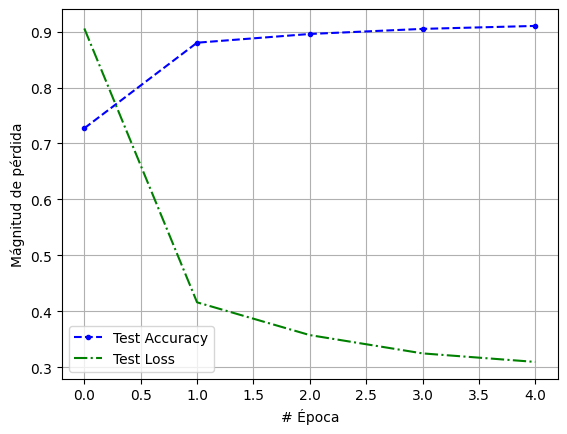

In [13]:
plt.xlabel('# Época')
plt.ylabel('Mágnitud de pérdida')
plt.plot(historial.history['accuracy'], 'b.--',label='Test Accuracy')
plt.plot(historial.history['loss'], 'g-.', label='Test Loss')
plt.grid()
plt.legend()
plt.show()

Esta parte del código se refiere a la evaluación de un modelo de red neuronal en TensorFlow después de haber sido entrenado. Está es la explicación de cada parte del código:

```python
test_loss, test_accuracy = model.evaluate(
    test_dataset, steps=math.ceil(num_test_examples/32)
)
```

1. `test_loss, test_accuracy`: En esta línea, se están declarando dos variables, `test_loss` y `test_accuracy`, que se utilizarán para almacenar los resultados de la evaluación del modelo. `test_loss` almacenará el valor de la función de pérdida en el conjunto de datos de prueba, y `test_accuracy` almacenará la precisión del modelo en el conjunto de datos de prueba.

2. `model.evaluate(...)`: Este método se utiliza para evaluar el modelo en un conjunto de datos de prueba. Proporciona información sobre el rendimiento del modelo en datos que no se utilizaron durante el entrenamiento.

3. `test_dataset`: `test_dataset` es el conjunto de datos de prueba que se utiliza para evaluar el modelo. Este conjunto de datos contiene ejemplos de entrada y sus respectivas etiquetas (objetivos) que se utilizarán para evaluar el rendimiento.

4. `test_dataset, steps=num_train_examples // BATCHSIZE`: El parámetro `steps` especifica cuántos pasos se realizarán durante la evaluación del modelo en el conjunto de datos de prueba. En este caso, se calcula dividiendo el número total de ejemplos de prueba (`num_test_examples`) entre el tamaño del lote (32 en este caso)`. Esto asegura que se procesen todos los ejemplos de prueba en el conjunto de datos.

Después de ejecutar este código, las variables `test_loss` y `test_accuracy` contendrán la pérdida y la precisión del modelo en el conjunto de datos de prueba, lo que te proporciona información importante sobre qué tan bien se desempeña el modelo en datos no vistos.

In [14]:
#Evaluar nuestro modelo ya entrenado, contra el dataset de pruebas
test_loss, test_accuracy = model.evaluate(
		test_dataset, steps=num_train_examples // BATCHSIZE
)
print("Resultado en las pruebas de pérdida: ", test_loss)
print("Resultado en las pruebas de acuerdo: ", test_accuracy)

 311/1875 [===>..........................] - ETA: 12s - loss: 0.2923 - accuracy: 0.9129

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2930 - accuracy: 0.9127
Resultado en las pruebas de pérdida:  0.2929615080356598
Resultado en las pruebas de acuerdo:  0.9126999974250793


____________________________________________________________
Esta parte del código se encarga de tomar un lote de ejemplos del conjunto de datos de prueba, convertir esos ejemplos a representaciones numéricas (en forma de matrices NumPy) y luego usar el modelo entrenado para realizar predicciones en esos ejemplos.

```python
for test_images, test_labels in test_dataset.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
	predictions = model.predict(test_images)
```

Aquí está la explicación detallada:

1. `for test_images, test_labels in test_dataset.take(1)`: Este bucle `for` itera a través del conjunto de datos de prueba (`test_dataset`) utilizando el método `.take(1)`. El método `.take(1)` toma un solo lote de ejemplos del conjunto de datos. En cada iteración del bucle, `test_images` y `test_labels` se asignan a un lote de imágenes y etiquetas de prueba.

2. `test_images = test_images.numpy()`: Aquí, las imágenes del lote se convierten a matrices NumPy. El método `.numpy()` se utiliza para extraer los valores numéricos de las imágenes. Esto es útil porque muchas operaciones de TensorFlow requieren matrices NumPy en lugar de tensores de TensorFlow.

3. `test_labels = test_labels.numpy()`: De manera similar, las etiquetas de prueba se convierten a matrices NumPy utilizando el método `.numpy()`.

4. `predictions = model.predict(test_images)`: Finalmente, se utiliza el modelo previamente entrenado para realizar predicciones en las imágenes de prueba almacenadas en `test_images`. El resultado de estas predicciones se almacena en la variable `predictions`.

En resumen, este fragmento de código toma un solo lote de ejemplos de prueba, convierte las imágenes y etiquetas a matrices NumPy y luego utiliza el modelo para realizar predicciones en esas imágenes. Esto te permite verificar cómo el modelo se desempeña en un conjunto de ejemplos específico del conjunto de datos de prueba.

In [15]:
for test_images, test_labels in test_dataset.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
	predictions = model.predict(test_images)


1/1 [==============================] - 0s 101ms/step


In [16]:
def plot_image(i, predictions_array, true_labels, images):
	predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img[...,0], cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)

In [17]:
def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#888888")
	plt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')


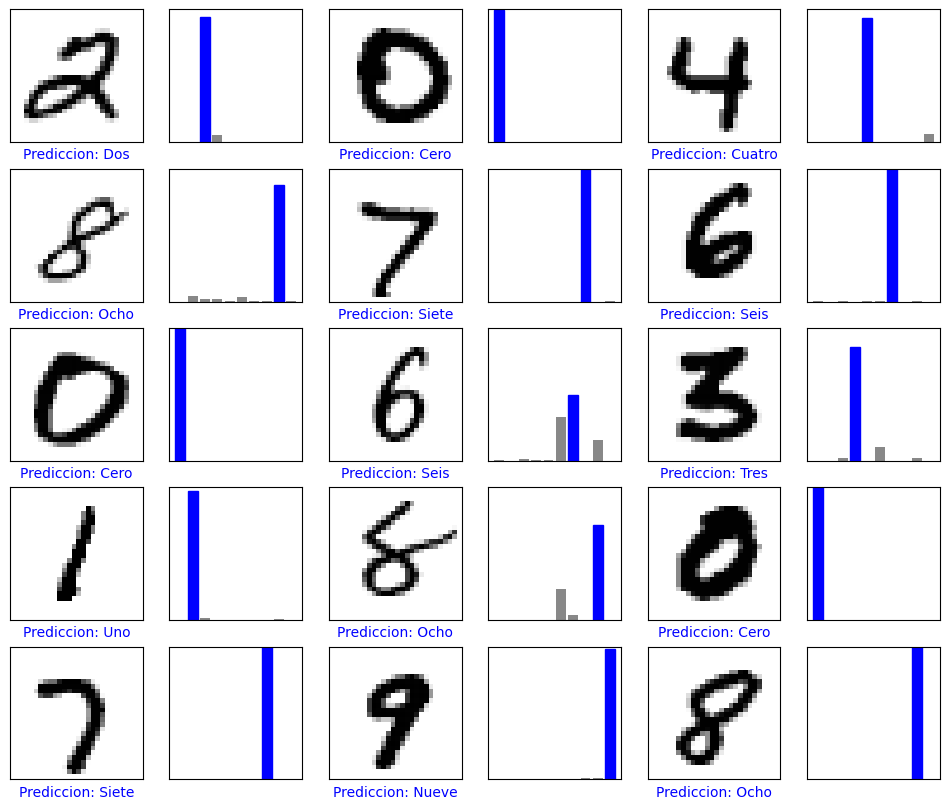

In [18]:
numrows=5
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)

plt.show()

In [20]:
print(test_labels[1])

0


Este el valor correcto:  2


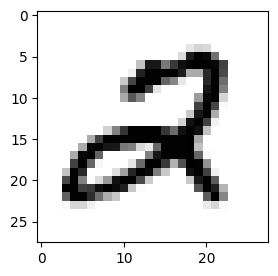

In [19]:
image_index = 0  # Índice de la imagen que deseas graficar

plt.figure(figsize=(6, 3))  # Ajusta el tamaño de la figura según tus preferencias
plt.imshow(test_images[image_index], cmap=plt.cm.binary)
# plt.imshow(test_images[image_index])
print('Este el valor correcto: ', test_labels[image_index])
plt.show()  # Muestra la figura
